In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing dataset

In [183]:
df_main1 = pd.read_csv("airline1.csv")
df_main2 = pd.read_csv("airline2.csv")
df_main3 = pd.read_csv("airline3.csv")
df_main4 = pd.read_csv("airline4.csv")
df_main5 = pd.read_csv("airline5.csv")
df_main6 = pd.read_csv("airline6.csv")

In [184]:
# Merging the data of the 6 months
df_main = df_main1.append([df_main2, df_main3, df_main4, df_main5, df_main6])
df_main.shape

(2547574, 18)

# Processing data

In [185]:
df_main.isna().sum()

MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER                   0
ORIGIN_AIRPORT_ID            0
ORIGIN_CITY_NAME             0
DEST_AIRPORT_ID              0
DEP_DEL15               263990
ARR_DELAY_NEW           268764
ARR_DELAY_GROUP         268764
CANCELLED                    0
CARRIER_DELAY          2295172
WEATHER_DELAY          2295172
NAS_DELAY              2295172
SECURITY_DELAY         2295172
LATE_AIRCRAFT_DELAY    2295172
Unnamed: 17            2547574
dtype: int64

In [186]:
df_main = df_main.drop(columns=["Unnamed: 17"])

In [187]:
df_main = df_main.dropna()

In [188]:
df_main[df_main['CANCELLED'] == 1.0].count()

MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
OP_UNIQUE_CARRIER      0
OP_CARRIER             0
ORIGIN_AIRPORT_ID      0
ORIGIN_CITY_NAME       0
DEST_AIRPORT_ID        0
DEP_DEL15              0
ARR_DELAY_NEW          0
ARR_DELAY_GROUP        0
CANCELLED              0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64

In [189]:
df_main

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEP_DEL15,ARR_DELAY_NEW,ARR_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,1,3,WN,WN,13891,"Ontario, CA",14771,1.0,68.0,4.0,0.0,8.0,0.0,27.0,0.0,33.0
7,1,1,3,WN,WN,13891,"Ontario, CA",14893,1.0,47.0,3.0,0.0,0.0,0.0,0.0,7.0,40.0
14,1,1,3,WN,WN,13931,"Norfolk, VA",10821,1.0,42.0,2.0,0.0,6.0,0.0,0.0,0.0,36.0
24,1,1,3,WN,WN,14027,"West Palm Beach/Palm Beach, FL",12391,1.0,179.0,11.0,0.0,179.0,0.0,0.0,0.0,0.0
29,1,1,3,WN,WN,14057,"Portland, OR",11292,1.0,28.0,1.0,0.0,28.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223637,6,25,4,MQ,MQ,11298,"Dallas/Fort Worth, TX",12992,1.0,62.0,4.0,0.0,30.0,0.0,1.0,0.0,31.0
223695,6,23,2,MQ,MQ,10792,"Buffalo, NY",11298,1.0,121.0,8.0,0.0,92.0,0.0,29.0,0.0,0.0
223723,6,21,7,MQ,MQ,11049,"College Station/Bryan, TX",11298,0.0,22.0,1.0,0.0,0.0,0.0,22.0,0.0,0.0
223725,6,23,2,MQ,MQ,11049,"College Station/Bryan, TX",11298,1.0,37.0,2.0,0.0,0.0,26.0,11.0,0.0,0.0


In [190]:
df_model = df_main.drop(columns=['CANCELLED', 'ORIGIN_CITY_NAME', 'OP_CARRIER', 'WEATHER_DELAY', 'CARRIER_DELAY'])

The 3 columns are no longer necessary and thus are dropped

In [191]:
df_model['SECURITY_DELAY_BIN'] = [1.0 if x >= 15.0 else 0.0 for x in df_model['SECURITY_DELAY']]
# df_model['WEATHER_DELAY_BIN'] = [1.0 if x >= 15.0 else 0.0 for x in df_model['WEATHER_DELAY']]
df_model['NAS_DELAY_BIN'] = [1.0 if x >= 15.0 else 0.0 for x in df_model['NAS_DELAY']]
# df_model['CARRIER_DELAY_BIN'] = [1.0 if x >= 15.0 else 0.0 for x in df_model['CARRIER_DELAY']]
df_model['LATE_AIRCRAFT_DELAY_BIN'] = [1.0 if x >= 15.0 else 0.0 for x in df_model['LATE_AIRCRAFT_DELAY']]
df_model['ARR_DELAY_GROUP_BIN'] = [1.0 if x >= 2.0 else 0.0 for x in df_model['ARR_DELAY_GROUP']]
df_model = df_model.drop(columns=['SECURITY_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY', 'ARR_DELAY_GROUP', 'ARR_DELAY_NEW'])

Classifying numeric data into groups

Assumptions made : for types of delay, they are considered significant if they are more than 15 minutes


Delay groups are only taken from value 2 and above (30 minutes or more) and values below 2 are treated as "not late" (0)

In [192]:
df_model.nunique()

MONTH                        6
DAY_OF_MONTH                31
DAY_OF_WEEK                  7
OP_UNIQUE_CARRIER           17
ORIGIN_AIRPORT_ID          360
DEST_AIRPORT_ID            361
DEP_DEL15                    2
SECURITY_DELAY_BIN           2
NAS_DELAY_BIN                2
LATE_AIRCRAFT_DELAY_BIN      2
ARR_DELAY_GROUP_BIN          2
dtype: int64

In [193]:
df_model['ARR_DELAY_GROUP_BIN'][df_model['ARR_DELAY_GROUP_BIN'] == 1.0].shape[0]

152705

(-1.1128296468555718,
 1.1006109764585643,
 -1.1193206525447241,
 1.114018261696804)

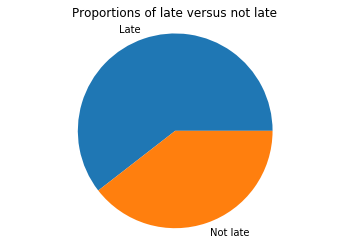

In [194]:
import matplotlib.pyplot as plt
sizes = [df_model['ARR_DELAY_GROUP_BIN'][df_model['ARR_DELAY_GROUP_BIN'] == 1.0].shape[0], df_model['ARR_DELAY_GROUP_BIN'][df_model['ARR_DELAY_GROUP_BIN'] == 0.0].shape[0]]
labels = 'Late', 'Not late'
plt.pie(sizes, labels=labels)
plt.title('Proportions of late versus not late')
plt.axis('equal')

The dataset in after filtering is not very biased

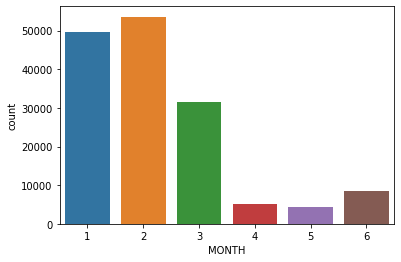

In [195]:
import seaborn as sns
by_month = df_model['MONTH'][df_model['ARR_DELAY_GROUP_BIN'] == 1.0]
sns.countplot(by_month)

Most of the delayed flights occurred in January, February and March

# Encoding dataset and splitting

In [196]:
from sklearn import tree, preprocessing, metrics, model_selection, linear_model
df_model_features = pd.get_dummies(df_model.drop(columns=['ARR_DELAY_GROUP_BIN']))
df_model_target = df_model['ARR_DELAY_GROUP_BIN']

trainX, testX, trainY, testY = model_selection.train_test_split(np.array(df_model_features), np.array(df_model_target), test_size=0.2)

In [197]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(df_model_features)
trainX_enc = enc.transform(trainX)
testX_enc = enc.transform(testX)
le = preprocessing.LabelEncoder()
le.fit(df_model_target)
trainY_enc = le.transform(trainY)
testY_enc = le.transform(testY)

Encoding features with one-hot encoder for SVM use

# Decision Tree

In [198]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_split=3)
decisionTree.fit(trainX, trainY)
predY = decisionTree.predict(testX)
print("Decision Tree without depth limit: ")
print(metrics.classification_report(testY, predY))
print("Depth of tree: {}".format(decisionTree.get_depth()))

Decision Tree without depth limit: 
              precision    recall  f1-score   support

         0.0       0.54      0.59      0.56     19995
         1.0       0.71      0.67      0.69     30486

    accuracy                           0.64     50481
   macro avg       0.63      0.63      0.63     50481
weighted avg       0.65      0.64      0.64     50481

Depth of tree: 58


In [199]:
decisionTree = DecisionTreeClassifier(random_state=0, max_depth=20, criterion='entropy', min_samples_split=3)
decisionTree.fit(trainX, trainY)
predY = decisionTree.predict(testX)
print("Decision Tree with depth limit: ")
print(metrics.classification_report(testY, predY))

Decision Tree with depth limit: 
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58     19995
         1.0       0.72      0.81      0.77     30486

    accuracy                           0.70     50481
   macro avg       0.69      0.67      0.67     50481
weighted avg       0.69      0.70      0.69     50481



Limiting the maximum depth of the decision tree to 20 did not significantly decrease the classifcation scores

# Random Forest Classifier

In [200]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(random_state=0, criterion='entropy')
randomForest.fit(trainX, trainY)
predY = randomForest.predict(testX)
print("Random Forest: ")
print(metrics.classification_report(testY, predY))

Random Forest: 
              precision    recall  f1-score   support

         0.0       0.62      0.55      0.59     19995
         1.0       0.73      0.78      0.75     30486

    accuracy                           0.69     50481
   macro avg       0.68      0.67      0.67     50481
weighted avg       0.69      0.69      0.69     50481



# Logistic Regression

In [201]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0)
logReg.fit(trainX, trainY)
predY = logReg.predict(testX)
print("Logistic Regression: ")
print(metrics.classification_report(testY, predY))

Logistic Regression: 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     19995
         1.0       0.60      1.00      0.75     30486

    accuracy                           0.60     50481
   macro avg       0.30      0.50      0.38     50481
weighted avg       0.36      0.60      0.45     50481



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

It seems that the model is confused by features and all the predictions made are 1.0, thus leading to 0 in precision, recall and f1-score for target 0.

# Gradient Boosting

In [202]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(trainX, trainY)
predY = gbc.predict(testX)
print("Gradient Boosting: ")
print(metrics.classification_report(testY, predY))

Gradient Boosting: 
              precision    recall  f1-score   support

         0.0       0.72      0.51      0.60     19995
         1.0       0.73      0.87      0.79     30486

    accuracy                           0.73     50481
   macro avg       0.73      0.69      0.70     50481
weighted avg       0.73      0.73      0.72     50481



# Gaussian Naive Bayes

In [203]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(trainX, trainY)
predY = naive.predict(testX)
print("Gaussian Naive Bayes: ")
print(metrics.classification_report(testY, predY))

Gaussian Naive Bayes: 
              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60     19995
         1.0       0.74      0.79      0.76     30486

    accuracy                           0.70     50481
   macro avg       0.69      0.68      0.68     50481
weighted avg       0.70      0.70      0.70     50481



# SVM

In [204]:
# from sklearn import svm
# svc = svm.SVC(random_state=0)
# svc.fit(trainX_enc, trainY_enc)
# predY = svc.predict(testX_enc)
# print("SVM: ")
# print(metrics.classification_report(testY, predY))

Applying PCA

Text(0, 0.5, 'cumulative explained variance')

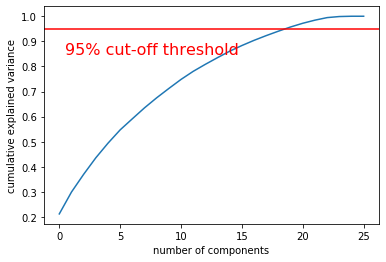

In [205]:
# Scale the data
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df_model_features)

pca = PCA().fit(data_rescaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [206]:
# Transform the data with PCA
pca = PCA(n_components=20)
features_pca = pca.fit_transform(df_model_features)

Applying SelectKBest

In [207]:
from sklearn.feature_selection import SelectKBest, chi2
features_kbest = SelectKBest(chi2, k=20).fit_transform(df_model_features, df_model_target)

Applying RFE

In [208]:
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVR
# estimator = SVR(kernel="linear")
# selector = RFE(estimator, n_features_to_select=5, step=1)
# selector = selector.fit(df_model_features, df_model_target)
# selector.support_
# selector.ranking_

Applying GridSearchCV

In [209]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# svc = svm.SVC()
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# clf = GridSearchCV(svc, parameters)
# clf.fit(df_model_features, df_model_target)
# sorted(clf.cv_results_.keys())

Decision Tree with PCA, no depth limit

In [210]:
trainX_pca, testX_pca, trainY_pca, testY_pca = model_selection.train_test_split(np.array(features_pca), np.array(df_model_target), test_size=0.2)

decisionTree = DecisionTreeClassifier(random_state=0, criterion='entropy')
decisionTree.fit(trainX_pca, trainY_pca)
predY_pca = decisionTree.predict(testX_pca)
print("Decision Tree with PCA: ")
print(metrics.classification_report(testY_pca, predY_pca))
print("Depth of tree: {}".format(decisionTree.get_depth()))

Decision Tree with PCA: 
              precision    recall  f1-score   support

         0.0       0.55      0.57      0.56     19971
         1.0       0.71      0.69      0.70     30510

    accuracy                           0.64     50481
   macro avg       0.63      0.63      0.63     50481
weighted avg       0.64      0.64      0.64     50481

Depth of tree: 132


There is a decrease in accuracy after applying PCA

Applying PCA with max depth limit

In [211]:
trainX_pca, testX_pca, trainY_pca, testY_pca = model_selection.train_test_split(np.array(features_pca), np.array(df_model_target), test_size=0.2)

decisionTree = DecisionTreeClassifier(random_state=0, max_depth=20, criterion='entropy')
decisionTree.fit(trainX_pca, trainY_pca)
predY_pca = decisionTree.predict(testX_pca)
print("Decision Tree with PCA: ")
print(metrics.classification_report(testY_pca, predY_pca))

Decision Tree with PCA: 
              precision    recall  f1-score   support

         0.0       0.68      0.50      0.57     19907
         1.0       0.72      0.85      0.78     30574

    accuracy                           0.71     50481
   macro avg       0.70      0.67      0.68     50481
weighted avg       0.70      0.71      0.70     50481



In [212]:
trainX_kbest, testX_kbest, trainY_kbest, testY_kbest = model_selection.train_test_split(np.array(features_kbest), np.array(df_model_target), test_size=0.2)
decisionTree = DecisionTreeClassifier(random_state=0, max_depth=20, criterion='entropy')
decisionTree.fit(trainX_kbest, trainY_kbest)
predY_kbest = decisionTree.predict(testX_kbest)
print("Decision Tree with KBest: ")
print(metrics.classification_report(testY_kbest, predY_kbest))

Decision Tree with KBest: 
              precision    recall  f1-score   support

         0.0       0.64      0.52      0.58     19804
         1.0       0.72      0.81      0.77     30677

    accuracy                           0.70     50481
   macro avg       0.68      0.67      0.67     50481
weighted avg       0.69      0.70      0.69     50481

